In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('deustchland-arbeitlos.csv', sep=";")
df.tail(10)

,year,men,women,total,dependent_civilian_workers,all_civilian_workers,stock_job_vacancies,ratio_vacancies
21,2011,19845,16413,36258,14,13,5865,6
22,2012,20653,16930,37583,14,13,4924,8
23,2013,21506,17218,38724,15,13,4410,9
24,2014,20858,17311,38169,14,13,4486,9
25,2015,20800,17014,37814,14,13,5303,7
26,2016,20286,15870,36156,13,12,7199,5
27,2017,19119,14893,34012,12,11,7062,5
28,2018,17827,13855,31682,11,10,6971,5
29,2019,17938,13904,31842,11,10,6356,5
30,2020,21425,16172,37597,13,12,4605,8


In [3]:
# The year of unemployment records in Germany
year = df['year'].to_numpy()

# Number of jobless men by year 
men = df['men'].to_numpy()

# Number of jobless women by year
women = df['women'].to_numpy()

# Total number of jobless people
total = df['total'].to_numpy()

# Unemployment rate based on dependent civilian workers
civil_workers = df['dependent_civilian_workers'].to_numpy()

# Unemployment rate based on all civilian workers
all_civilians = df['all_civilian_workers'].to_numpy()

# Stock of reported job vacancies at the end of the month
stock_job_vacancies = df['stock_job_vacancies'].to_numpy()

# Ratio of unemployed/registered vacancies
ratio_vacancies = df['ratio_vacancies'].to_numpy()


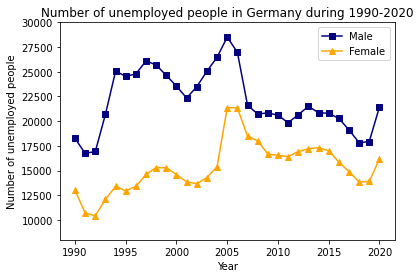

In [4]:
# Create the plot
plt.plot(year, men, color='navy', marker='s', linestyle='solid',label="Male")
plt.plot(year, women, color='orange', marker='^', linestyle='solid',label="Female")
#plt.plot(year, civil_workers, color='green', marker='o', linestyle='solid',label="Civil workers")
# Add title and labels
plt.title("Number of unemployed people in Germany during 1990-2020")
plt.xlabel("Year")
plt.ylabel("Number of unemployed people")
plt.ylim([8000, 30000])
# Add legend
plt.legend()
# Show the plot
plt.show()

([<matplotlib.axis.XTick at 0x164306db640>,
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010')])

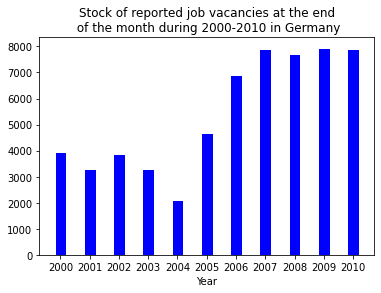

In [5]:
# Set the bar width
bar_width = 0.4

year_truncated = year[10:21]
civil_new = civil_workers[10:21]
all_civilians_new = all_civilians[10:21]
stock_job_vacancies_new = stock_job_vacancies[10:21]
# Create the bars for each year
r1 = np.arange(len(year_truncated))
#r2 = [x + bar_width for x in r1]

# Create the plot
plt.bar(r1, stock_job_vacancies_new , color='blue', width=bar_width, edgecolor='white', label='Civil Workers')
#plt.bar(r2, all_civilians_new , color='red', width=bar_width, edgecolor='white', label='All Civilians')

# Add title and labels
plt.title('Stock of reported job vacancies at the end\n of the month during 2000-2010 in Germany')
plt.xlabel('Year')
#plt.ylabel()


# Add xticks
#plt.xticks([r + bar_width/2 for r in range(len(year_truncated))], year_truncated)
plt.xticks([r for r in range(len(year_truncated))], year_truncated)#, rotation=90)
# Add legend
#plt.legend()

In [6]:

sns.set_context("paper", rc={'font.size': 25,
                            'axes.labelsize': 25,
                            'axes.titlesize': 25,
                            'xtick.labelsize': 25,
                            'ytick.labelsize': 25,
                            'legend.fontsize': 25,
                            'legend.title_fontsize': None,
                            'font_scale':1})



c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.08, ' Unemployment rate of dependent civilian workers, all civilian workers\nand ratio of unemployed/registered vacancies')

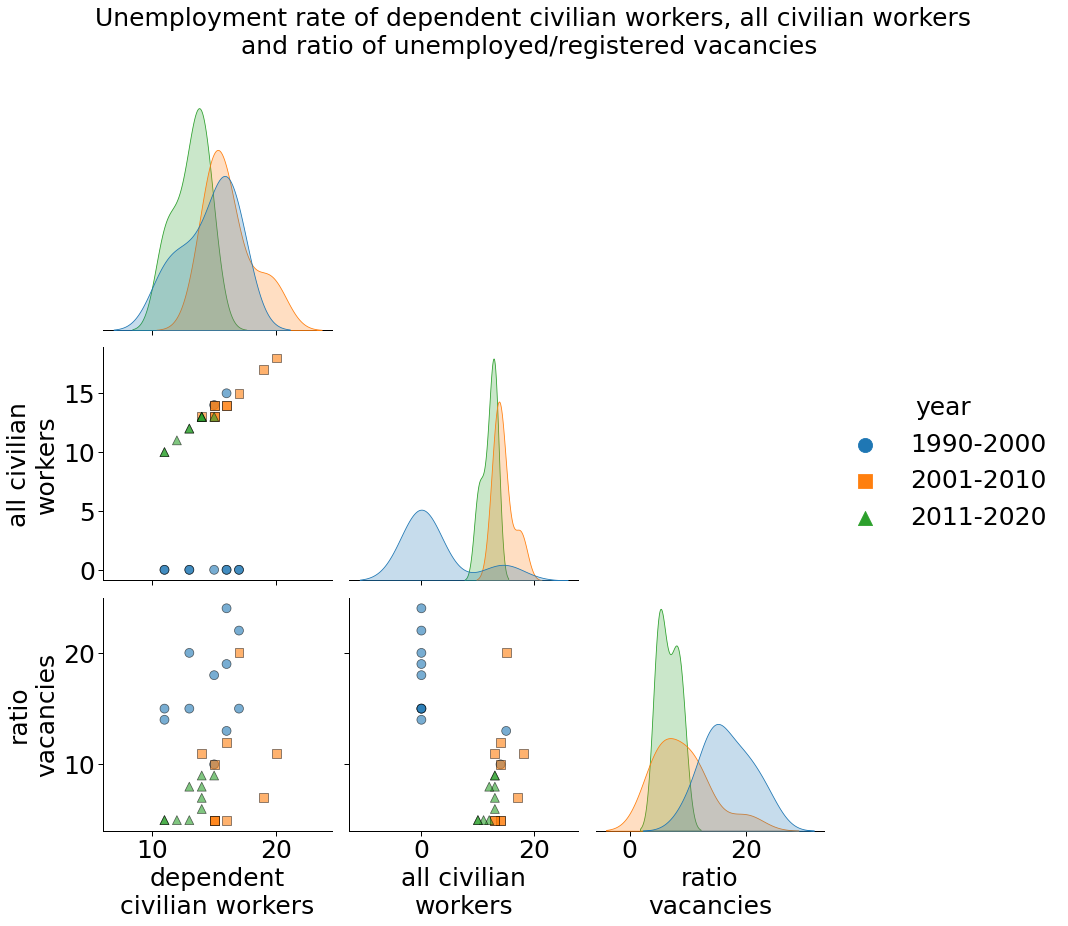

In [8]:
df_new = pd.DataFrame()

df_new = df.loc[:, ['dependent_civilian_workers', 'all_civilian_workers', 'ratio_vacancies']]
df_new = df_new.rename(columns={'dependent_civilian_workers': 'dependent\ncivilian workers', 
                        'all_civilian_workers': 'all civilian\nworkers',
                        'ratio_vacancies': 'ratio\nvacancies',
                        })
# Initialize an empty list for the new strings
year_strings = []

# Loop through each year in the year list
for yearNumber in year:
    # Check which decade the year belongs to and add the appropriate string to the year_strings list
    if yearNumber <= 2000:
        year_strings.append("1990-2000")
    elif yearNumber <= 2010:
        year_strings.append("2001-2010")
    else:
        year_strings.append("2011-2020")

df_new["year"] = year_strings 
pairplot = sns.pairplot(df_new, diag_kind="kde", corner=True, hue="year", plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, markers=["o", "s", "^"], size = 4)

for lh in pairplot._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [200]
# # for legend text
# plt.setp(pairplot.get_legend().get_texts(), fontsize='10') 
 
# # for legend title
# plt.setp(pairplot.get_legend().get_title(), fontsize='20') 

#http://seaborn.pydata.org/generated/seaborn.plotting_context.html

#plt.legend(title='Team', fontsize='medium', title_fontsize='x-large')
#plt.title("Pairwise plots of four fatty acids\n with respect to three regions in Italy")
pairplot.fig.suptitle(" Unemployment rate of dependent civilian workers, all civilian workers\nand ratio of unemployed/registered vacancies", fontsize=25, y=1.08) # y= some height>1
#plt.setp(pairplot.get_legend().get_texts(), fontsize='22') # for legend text
#plt.setp(pairplot.get_legend().get_title(), fontsize='32') # for legend title
# plt.savefig('figure6.png', bbox_inches = 'tight')